In [1]:
%matplotlib inline
import cvxpy as cvx
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("../javamsketch/results/logmilan_point_1513717939.csv")
orig_df = pd.read_csv("../../datasets/l_internet-mi-2013-11-01_09.csv")
orig_data = orig_df["l_internet"]

In [5]:
def get_error(sorted_data, x, p, is_int=False):
    if is_int:
        x = round(x)
    n = len(sorted_data)
    li = np.searchsorted(sorted_data, x, side="left")
    ri = np.searchsorted(sorted_data, x, side="right")
    qi = int(p * n)
    if ri < qi:
        return (qi-ri)*1.0/n
    elif li > qi:
        return (li-qi)*1.0/n
    else:
        return 0.0

In [ ]:
sketches = ["moment", "tdigest", "yahoo", "sampling", "spark_gk"]

In [19]:
def gen_plots(df, sorted_data, name):
    dft = df[df["trial"] > 0].groupby(
        ["sketch", "size_param", "q"]
    )["quantile_estimate", "train_time", "query_time", "space", "bound_size"].mean()
    dft = dft.reset_index()
    dft["error"] = dft.apply(
        lambda r: get_error(
            sorted_data, r["quantile_estimate"], r["q"],
            is_int=False
        ),
        axis=1
    )
    dft["rerror"] = dft["error"] / np.minimum(dft["q"],(1-dft["q"]))
    dfg = dft.groupby([
        "sketch", "size_param"
    ])["train_time", "query_time", "space", "error", "rerror", "bound_size"].mean()
    dfs = dfg.reset_index().sort_values(["size_param"])
    
    plt.figure()
    for alg in sketches:
        c_df = dfs[dfs["sketch"] == alg]
        plt.loglog(
            c_df["space"], 
            (c_df["query_time"])*1e-9,
            label=alg,
            marker="."
        )
    plt.xlabel("Size (bytes)")
    plt.ylabel("Query Time (s)")
    plt.legend(loc=4)
    plt.title(name)
    plt.savefig("{}_query_time.pdf".format(name))
    
    n = len(orig_data)
    plt.figure()
    for alg in sketches:
        c_df = dfs[dfs["sketch"] == alg]
        plt.loglog(
            c_df["space"], 
            (c_df["train_time"])/n,
            label=alg,
    #         lw=0,
            marker="."
        )
    plt.xlabel("Size (bytes)")
    plt.ylabel("Update Time (ns)")
    plt.legend(loc=4)
    plt.title(name)
    plt.savefig("{}_update_time.pdf".format(name))
    
    plt.figure()
    for alg in sketches:
        c_df = dfs[dfs["sketch"] == alg]
        plt.loglog(
            c_df["space"],
            c_df["error"], 
            label=alg,
            marker="."
        )
    plt.xlabel("Size (Bytes)")
    plt.ylabel("Avg Error")
    plt.legend()
    plt.title(name)
    plt.savefig("{}_error.pdf".format(name))
    
    plt.figure()
    for alg in sketches:
        c_df = dfs[dfs["sketch"] == alg]
        plt.loglog(
            c_df["space"],
            c_df["bound_size"], 
            label=alg,
            marker="."
        )
    plt.xlabel("Size (Bytes)")
    plt.ylabel("Avg Bound Size")
    plt.legend()
    plt.title(name)
    plt.savefig("{}_bound.pdf".format(name))
    
    return dft

In [17]:
df = pd.read_csv("../javamsketch/results/milan_point_1513719294.csv")
orig_df = pd.read_csv("../../datasets/internet-mi-2013-11-01_09.csv")
orig_data = orig_df["internet"]
sorted_data = np.sort(orig_data)

,sketch,size_param,q,quantile_estimate,train_time,query_time,space,bound_size,error,rerror
0,moment,3.0,0.01,0.357119,1.094387e+08,7.391627e+05,40.0,0.873779,0.390775,39.077533
1,moment,3.0,0.05,1.816862,1.094387e+08,7.391627e+05,40.0,0.841906,0.415895,8.317895
2,moment,3.0,0.10,3.732627,1.094387e+08,7.391627e+05,40.0,0.802282,0.399250,3.992503
3,moment,3.0,0.15,5.759369,1.094387e+08,7.391627e+05,40.0,0.762867,0.380316,2.535438
4,moment,3.0,0.20,7.908131,1.094387e+08,7.391627e+05,40.0,0.723607,0.358250,1.791249
5,moment,3.0,0.25,10.201231,1.094387e+08,7.391627e+05,40.0,0.684472,0.334033,1.336130
6,moment,3.0,0.30,12.651071,1.094387e+08,7.391627e+05,40.0,0.645338,0.309021,1.030068
7,moment,3.0,0.35,15.283600,1.094387e+08,7.391627e+05,40.0,0.606092,0.283932,0.811234
8,moment,3.0,0.40,18.132069,1.094387e+08,7.391627e+05,40.0,0.566563,0.257472,0.643680
9,moment,3.0,0.45,21.227353,1.094387e+08,7.391627e+05,40.0,0.526469,0.230128,0.511395


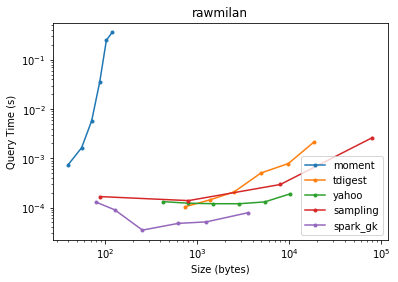

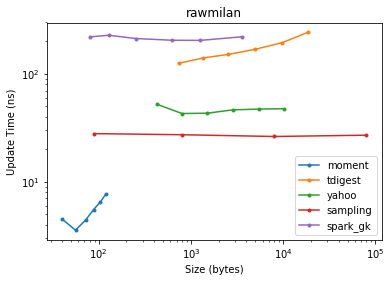

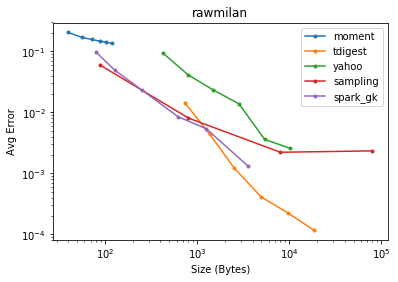

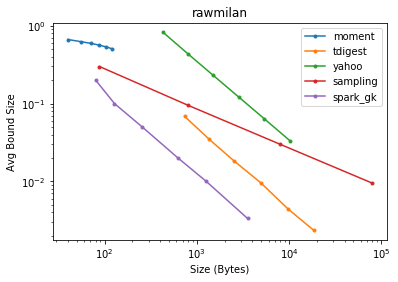

In [20]:
_ = gen_plots(df, sorted_data, "rawmilan")

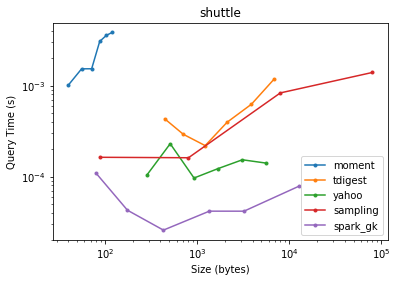

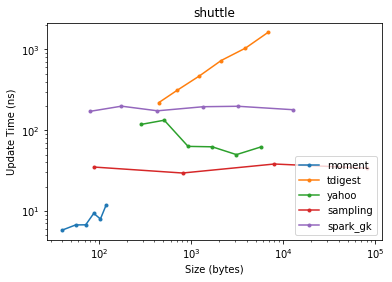

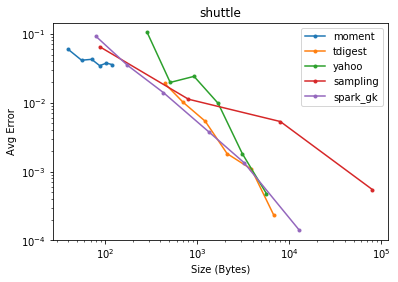

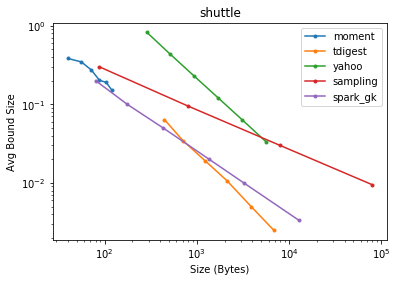

In [22]:
df = pd.read_csv("../javamsketch/results/shuttle_acc_1513719981.csv")
orig_data = pd.read_csv("../sampledata/shuttle.csv", usecols=[0])["0"]
sorted_data = np.sort(orig_data)
dft = gen_plots(df, sorted_data, "shuttle")

In [24]:
dft[
    (dft["sketch"] == "moment")
    & (dft["q"] == .5)
]

,sketch,size_param,q,quantile_estimate,train_time,query_time,space,bound_size,error,rerror
10,moment,3.0,0.5,47.205816,251805.50,1006443.50,40.0,0.500000,0.061931,0.123862
31,moment,5.0,0.5,45.751919,291976.25,1529443.25,56.0,0.475101,0.002483,0.004966
52,moment,7.0,0.5,45.363245,292916.25,1532305.75,72.0,0.343168,0.002483,0.004966
73,moment,9.0,0.5,45.909329,405929.00,3058421.25,88.0,0.211875,0.002483,0.004966
94,moment,11.0,0.5,46.705757,346002.00,3567629.50,104.0,0.214564,0.041632,0.083264
115,moment,13.0,0.5,46.430673,516122.00,3839147.00,120.0,0.189918,0.041632,0.083264
